In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Power plant generator

In [2]:
def power_plant(t):
    operation = np.zeros((2, t.size))
    operation[0, np.logical_and(t <= 100., t >= -100)] = 100
    operation[1, :] = - operation[0, :]
    
    return operation

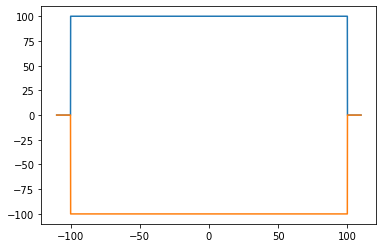

In [3]:
t = np.arange(-110, 110, 0.1)
plt.plot(t, power_plant(t)[0])
plt.plot(t, power_plant(t)[1])

### Solar farm

In [4]:
def pq_region(p_max, q_max, p_q1, p_q2, q_h):
    operation = np.zeros((2, t.size))
    operation[0, np.logical_and(t >= 0, t <= p_q1)] = p_max
    
    mask = np.logical_and(t > p_q1, t < p_q2)
    operation[0, mask] = p_max - (t[mask] - p_q1) * ((p_max - q_h) / (p_q2 - p_q1))
    operation[1, :] = - operation[0, :]
    
    return operation
    
def solar_farm(t):
    p_max = 30.
    q_max = 30.
    p_q1 = 20.
    p_q2 = 30.
    q_h = 15.
    pq_ratio = 0.2
    
    region = pq_region(p_max, q_max, p_q1, p_q2, q_h)
    
    line = t * pq_ratio * (region[0, :] > 0.).astype(np.int)
    
    return region, line

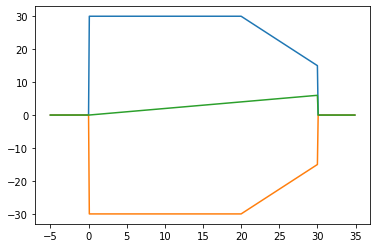

In [5]:
t = np.arange(-5, 35, 0.1)
region, line = solar_farm(t)

plt.plot(t, region[0])
plt.plot(t, region[1])
plt.plot(t, line)

### Wind farm

In [6]:
def wind_farm(t):
    p_max = 50.
    q_max = 50.
    p_q1 = 35.
    p_q2 = 50.
    q_h = 20.
    pq_ratio = 0.2
    
    region = pq_region(p_max, q_max, p_q1, p_q2, q_h)
    
    line = t * pq_ratio * (region[0, :] > 0.).astype(np.int)
    
    return region, line

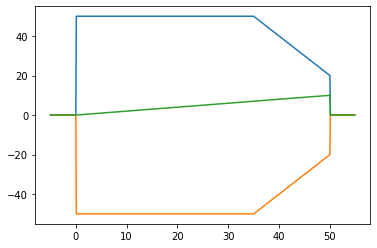

In [7]:
t = np.arange(-5, 55, 0.1)
region, line = wind_farm(t)

plt.plot(t, region[0])
plt.plot(t, region[1])
plt.plot(t, line)

### Storage unit

In [8]:
def storage(t):
    p_max = 50.
    q_max = 50.
    p_q1 = 30.
    p_q2 = 50.
    q_h = 25.
    
    operation = np.zeros((2, t.size))
    operation[0, np.logical_and(t >= - p_max, t <= p_q1)] = p_max
    
    mask = np.logical_and(t > p_q1, t < p_q2)
    operation[0, mask] = p_max - (t[mask] - p_q1) * ((p_max - q_h) / (p_q2 - p_q1))

    mask = np.logical_and(t < - p_q1, t > - p_q2)
    operation[0, mask] = q_h + (t[mask] + p_q2) * ((p_max - q_h) / (p_q2 - p_q1))
    
    operation[1, :] = - operation[0, :]
    
    return operation

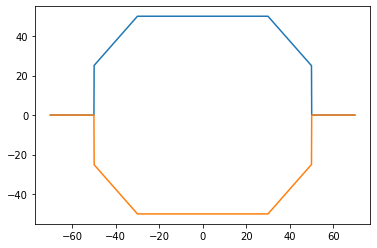

In [9]:
t = np.arange(-70, 70, 0.1)
plt.plot(t, storage(t)[0])
plt.plot(t, storage(t)[1])

### All of them

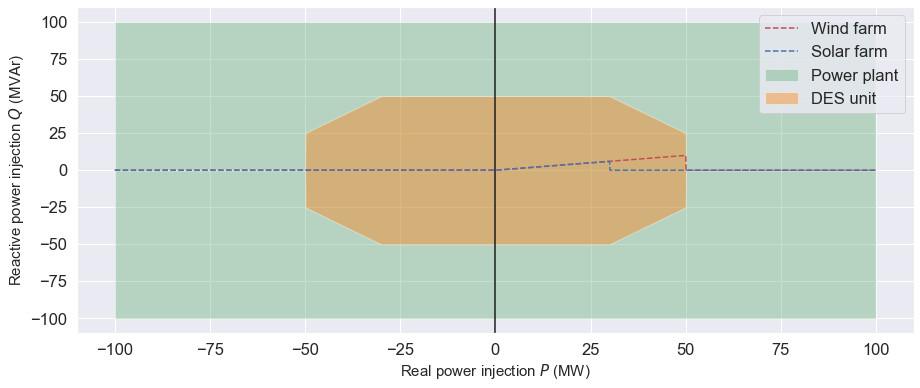

In [36]:
sns.set(style="darkgrid", font_scale=1.5)

plt.figure(figsize=(15, 6))

t = np.arange(-100, 100, 0.1)

region_pp = power_plant(t)
region_solar, line_solar = solar_farm(t)
region_wind, line_wind = wind_farm(t)
region_su = storage(t)

plt.fill_between(t, region_pp[0], region_pp[1], facecolor='g', alpha=0.35, label='Power plant')

# plt.fill_between(t, region_wind[0], region_wind[1], facecolor='tab:blue', alpha=0.3)
plt.plot(t, line_wind, color='r', label='Wind farm', linestyle='--')

# plt.fill_between(t, region_solar[0], region_solar[1], facecolor='tab:green', alpha=0.4)
plt.plot(t, line_solar, color='b', label='Solar farm', linestyle='--')

plt.fill_between(t, region_su[0], region_su[1], facecolor='tab:orange', alpha=0.4, label='DES unit')

# plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.xlabel('Real power injection $P$ (MW)', fontsize=15)
plt.ylabel('Reactive power injection $Q$ (MVAr)', fontsize=15)
plt.legend()
plt.xticks(np.arange(min(t), max(t)+1, 25))

plt.savefig('pq_feasible_regions.pdf', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>